<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #7: Clasificación de textos
`Fecha de entrega: Abril 22, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [1]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [2]:
# Cargar datos
path = "./reviews_vidjew_es.csv"
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


In [3]:
data["product_category"].unique()

array(['jewelry', 'video_games'], dtype=object)

### `[8 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [4]:
X = data["review_body"] +" "+ data["review_title"]
y = data["product_category"]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tenemos {data.shape[0]} datos en total.")
print(f"El conjunto de datos de entrenamiento (train) tiene {X_train.shape[0]} datos.")
print(f"El conjunto de datos de prueba (test) tiene {X_test.shape[0]} datos.")

Tenemos 1000 datos en total.
El conjunto de datos de entrenamiento (train) tiene 800 datos.
El conjunto de datos de prueba (test) tiene 200 datos.


###  `[8 pts]` Punto 2: Hacer pre-procesamiento del texto

In [6]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_sp = stopwords.words('spanish')


def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

In [7]:
X_train_pre = tfidf_vect.fit_transform(X_train)
X_test_pre = tfidf_vect.transform(X_test)

In [8]:
X_train_pre.shape, y_train.shape

((800, 3429), (800,))

###  `[10 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, Árbol de Decisión, u otro.

In [9]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

# Inicializar los clasificadores
nb = MultinomialNB()
logreg = LogisticRegression(class_weight='balanced')
svm = LinearSVC(class_weight='balanced')
dt = DecisionTreeClassifier(class_weight='balanced')

In [10]:
nb.fit(X_train_pre, y_train)
logreg.fit(X_train_pre, y_train)
svm.fit(X_train_pre, y_train)
dt.fit(X_train_pre, y_train);

In [11]:
y_pred_nb = nb.predict(X_test_pre)
y_pred_logreg = logreg.predict(X_test_pre)
y_pred_svm = svm.predict(X_test_pre)
y_pred_dt = dt.predict(X_test_pre)

###  `[10 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

y_preds = {"naive_bayes": {"pred": y_pred_nb, "model":nb}
           ,"logistic_reg": {"pred": y_pred_logreg, "model":logreg}
           ,"svm": {"pred": y_pred_svm, "model":svm}
           ,"decision_tree": {"pred": y_pred_dt, "model": dt}
           }

for key, val in y_preds.items():
    print(f"Model: {key} ----------------------------------")
    print(classification_report(y_test, val["pred"]))


Model: naive_bayes ----------------------------------
              precision    recall  f1-score   support

     jewelry       0.84      0.94      0.89        97
 video_games       0.93      0.83      0.88       103

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200

Model: logistic_reg ----------------------------------
              precision    recall  f1-score   support

     jewelry       0.85      0.88      0.86        97
 video_games       0.88      0.85      0.87       103

    accuracy                           0.86       200
   macro avg       0.86      0.87      0.86       200
weighted avg       0.87      0.86      0.87       200

Model: svm ----------------------------------
              precision    recall  f1-score   support

     jewelry       0.82      0.87      0.84        97
 video_games       0.87      0.82      0.84       103

    accuracy               

###  `[BONUS: 3 pts]` Matriz de confusión

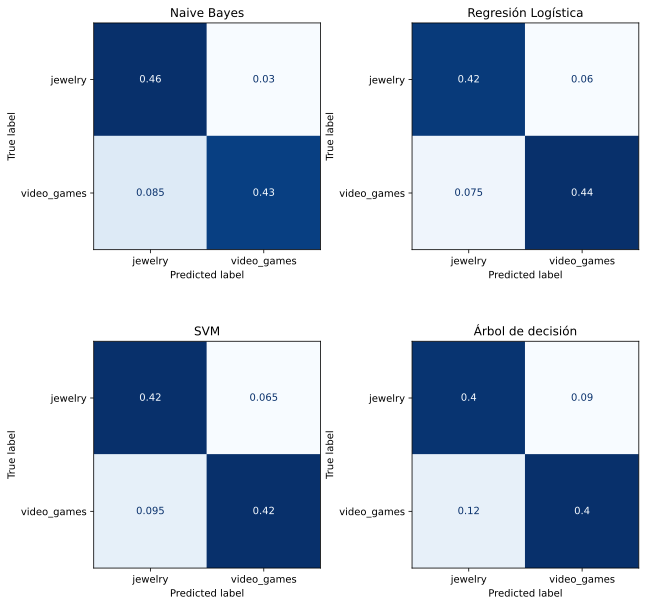

In [17]:
%config InlineBackend.figure_format = 'svg'

fig = plt.figure(figsize=(9,9))

ax1 = fig.add_subplot(2,2,1)
plot_confusion_matrix(nb, X_test_pre, y_test, cmap="Blues", ax=ax1, normalize='all').im_.colorbar.remove()
plt.title("Naive Bayes")

ax2 = fig.add_subplot(2,2,2)
plot_confusion_matrix(logreg, X_test_pre, y_test, cmap = 'Blues', ax=ax2, normalize='all').im_.colorbar.remove()
plt.title("Regresión Logística")

ax3 = fig.add_subplot(2,2,3)
plot_confusion_matrix(svm, X_test_pre, y_test, cmap = 'Blues', ax=ax3, normalize='all').im_.colorbar.remove() 
plt.title("SVM");

ax4 = fig.add_subplot(2,2,4)
plot_confusion_matrix(dt, X_test_pre, y_test, cmap = 'Blues', ax=ax4, normalize='all').im_.colorbar.remove() 
plt.title("Árbol de decisión")

plt.tight_layout()
plt.show()

###  `[12 pts]` Punto 5: Términos más importantes de cada categoría

In [33]:
# Explicación 
vocab = {value:key for key,value in tfidf_vect.vocabulary_.items()}

text_jew = "**********Las palabras que contribuyen a la clase jewelry"
text_vid = "**********Las palabras que contribuyen a la clase video_games"

for key, val in y_preds.items():
    if key != "decision_tree":
        words = [(vocab[e[0]], round(e[1],2)) for e in zip(val["model"].coef_[0].argsort(), sorted(val["model"].coef_[0]))]
        print(f"\nModel: {key} ----------------------------------")
        print(text_jew)
        print(words[:10])
        print(text_vid)
        print(words[-10:])
    else:
        words = [(vocab[e[0]],round(e[1],2)) for e in zip(val["model"].feature_importances_.argsort()
                                     , sorted(val["model"].feature_importances_))]
        print(f"\nModel: {key} ----------------------------------")
        print(words[-10:])


Model: naive_bayes ----------------------------------
**********Las palabras que contribuyen a la clase jewelry
[('útiles', -8.48), ('presentada', -8.48), ('presentado', -8.48), ('cuestión', -8.48), ('sobrao', -8.48), ('cuidandolas', -8.48), ('presentados', -8.48), ('presentan', -8.48), ('sobraba', -8.48), ('cumpleaños', -8.48)]
**********Las palabras que contribuyen a la clase video_games
[('buena', -6.5), ('calidad', -6.48), ('si', -6.39), ('mando', -6.31), ('buen', -6.23), ('precio', -6.13), ('producto', -6.02), ('perfecto', -6.0), ('bien', -5.93), ('juego', -5.54)]

Model: logistic_reg ----------------------------------
**********Las palabras que contribuyen a la clase jewelry
[('pulsera', -2.2), ('bonito', -2.2), ('bonitos', -2.07), ('calidad', -2.04), ('foto', -1.78), ('bonita', -1.65), ('plata', -1.58), ('pendientes', -1.44), ('cadena', -1.33), ('colgante', -1.26)]
**********Las palabras que contribuyen a la clase video_games
[('botones', 1.04), ('mandos', 1.04), ('consola', 1.

### `[2 pts]` Punto 6: Pregunta

- ¿Qué interpretación y/o conclusiones saca de su modelo?

Todos los modelos tienen metricas de evaluacion de desempeño buenas y cercanas, pero dado cada metrica podemos ordenarlos de la siguiente manera de mejor a peor:
- **Acuraccy**: naive_bayes > logistic_reg > svm > decision_tree 
- **Precision**: naive_bayes > logistic_reg > svm > decision_tree 
- **Recall**: naive_bayes > logistic_reg > svm > decision_tree 

El error al momento de clasificar va desde 20% (en el peor de los casos Decision Tree) hasta un 11% (en el mejor de los casos Naive Bayes), por lo que si es en terminos de metricas de evaluación de desempeño, el modelo mas recomendable es el de **Naive Bayes**

El comportamiento de la importancia de palabras es similar en todos los modelos para **video_games** dado que "juego" y "mando" son de las palabras mas relevantes para clasificar esta categoria, por el contrario para **jewelry** el comportamiento es similar entre "SVM" y "logistic regression" pero un diferente con respecto a "Naive Bayes" (ej. mientras que "pulsera", "calidad" y "bonito" son de las mas relevantes para la categoria **jewelry** en SVM y Logistic Regression, para Naive Bayes no lo es)

